In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

32.430184647719756 -122.9140613090291
-41.47206598772222 -16.706976130923977
83.28691764284233 105.59587788987449
-48.65703394153248 20.888906572041037
3.9696128876429384 17.044680176391353
-13.996154653597486 167.73421777279742
-13.743863980822056 -152.4285080191329
63.87925381113115 163.0722397003977
-46.61690549383221 -44.191404045857894
46.1858540643143 12.064620986823513
-74.59219643815223 -14.5949822197409
36.91779452347845 -8.882768558672325
-70.28343697603084 -37.506209333886005
-16.679863781087676 124.48290180525584
14.653117156100848 -25.760215186923944
64.68257500745653 -107.83806110624198
-43.350935735465555 131.6718425200403
40.539823342957135 -85.82193657300468
55.470386324969326 16.547119318268642
-42.099582167505204 -32.32877349552783
-37.152905339683684 -85.5520949784439
5.623059410170043 -50.64544619023576
41.47455792316464 -154.61887953755598
49.26614415825881 69.17987563659713
87.16998474297611 -0.10834810951729423
29.632216210073324 -53.16958204276587
-67.497968559

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | bredasdorp
Processing Record 5 of Set 1 | boda
Processing Record 6 of Set 1 | sola
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 9 of Set 1 | rocha
Processing Record 10 of Set 1 | belluno
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | lagos
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | broome
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | port lincoln
Processing Record 18 of Set 1 | marion
Processing Record 19 of Set 1 | ustka
Processing Record 20 of Set 1 | laguna
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | cayenne
Processing Record 23 of Set 1 | kodiak

Processing Record 40 of Set 4 | tsimlyansk
Processing Record 41 of Set 4 | lorengau
Processing Record 42 of Set 4 | kashi
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | norman wells
Processing Record 45 of Set 4 | griffith
Processing Record 46 of Set 4 | ribeira grande
Processing Record 47 of Set 4 | mareeba
Processing Record 48 of Set 4 | ayan
Processing Record 49 of Set 4 | phan rang
City not found. Skipping...
Processing Record 50 of Set 4 | salalah
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | camacha
Processing Record 3 of Set 5 | marawi
Processing Record 4 of Set 5 | sao felix do xingu
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | ibra
Processing Record 7 of Set 5 | ban phai
Processing Record 8 of Set 5 | molina
Processing Record 9 of Set 5 | keti bandar
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | bandar-e lengeh
Processing Record 12 of Set 5 | roma
Processing 

Processing Record 29 of Set 8 | riberalta
Processing Record 30 of Set 8 | nyurba
Processing Record 31 of Set 8 | samarai
Processing Record 32 of Set 8 | vanimo
Processing Record 33 of Set 8 | baruun-urt
Processing Record 34 of Set 8 | clinton
Processing Record 35 of Set 8 | suntar
Processing Record 36 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 37 of Set 8 | bathsheba
Processing Record 38 of Set 8 | rognan
Processing Record 39 of Set 8 | maragogi
Processing Record 40 of Set 8 | chor
Processing Record 41 of Set 8 | champerico
Processing Record 42 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 43 of Set 8 | eyl
Processing Record 44 of Set 8 | karatau
Processing Record 45 of Set 8 | jiddah
City not found. Skipping...
Processing Record 46 of Set 8 | polyarnyy
Processing Record 47 of Set 8 | praia
Processing Record 48 of Set 8 | requena
Processing Record 49 of Set 8 | matara
Processing Record 50 of Set 8 | karimnagar
Processing Record 1 of Set 9 | v

Processing Record 15 of Set 12 | thimiana
City not found. Skipping...
Processing Record 16 of Set 12 | minas
Processing Record 17 of Set 12 | namie
Processing Record 18 of Set 12 | ndouci
City not found. Skipping...
Processing Record 19 of Set 12 | boddam
Processing Record 20 of Set 12 | bluefields
Processing Record 21 of Set 12 | vichuga
Processing Record 22 of Set 12 | taltal
Processing Record 23 of Set 12 | baiyin
Processing Record 24 of Set 12 | mocajuba
Processing Record 25 of Set 12 | saint-augustin
Processing Record 26 of Set 12 | bodden town
Processing Record 27 of Set 12 | kegayli
City not found. Skipping...
Processing Record 28 of Set 12 | kalispell
Processing Record 29 of Set 12 | tena
Processing Record 30 of Set 12 | syracuse
Processing Record 31 of Set 12 | helong
Processing Record 32 of Set 12 | negele
City not found. Skipping...
Processing Record 33 of Set 12 | hurghada
Processing Record 34 of Set 12 | greytown
Processing Record 35 of Set 12 | sabinas hidalgo
Processing 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lompoc,34.6391,-120.4579,68.85,74,0,6.91,US,2022-06-11 03:31:55
1,Jamestown,42.0970,-79.2353,57.18,63,34,2.98,US,2022-06-11 03:31:45
2,Khatanga,71.9667,102.5000,51.04,47,28,7.87,RU,2022-06-11 03:31:55
3,Bredasdorp,-34.5322,20.0403,61.48,29,99,6.91,ZA,2022-06-11 03:30:04
4,Boda,4.3189,17.4695,68.58,97,87,1.21,CF,2022-06-11 03:31:56
5,Sola,-13.8833,167.5500,86.67,74,75,0.00,VU,2022-06-11 03:31:56
6,Faanui,-16.4833,-151.7500,79.88,75,16,14.00,PF,2022-06-11 03:31:57
7,Rocha,-34.4833,-54.3333,46.29,59,56,16.31,UY,2022-06-11 03:31:57
8,Belluno,46.1450,12.2214,62.65,81,5,1.99,IT,2022-06-11 03:31:58
9,Cape Town,-33.9258,18.4232,63.01,34,0,4.61,ZA,2022-06-11 03:31:58


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [11]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lompoc,US,2022-06-11 03:31:55,34.6391,-120.4579,68.85,74,0,6.91
1,Jamestown,US,2022-06-11 03:31:45,42.0970,-79.2353,57.18,63,34,2.98
2,Khatanga,RU,2022-06-11 03:31:55,71.9667,102.5000,51.04,47,28,7.87
3,Bredasdorp,ZA,2022-06-11 03:30:04,-34.5322,20.0403,61.48,29,99,6.91
4,Boda,CF,2022-06-11 03:31:56,4.3189,17.4695,68.58,97,87,1.21
...,...,...,...,...,...,...,...,...,...
555,Egvekinot,RU,2022-06-11 03:47:59,66.3167,-179.1667,47.52,33,79,1.68
556,Bubaque,GW,2022-06-11 03:47:59,11.2833,-15.8333,80.28,80,77,7.87
557,Martapura,ID,2022-06-11 03:48:00,-3.4167,114.8500,89.69,66,40,3.44
558,Caarapo,BR,2022-06-11 03:45:30,-22.6342,-54.8222,52.18,91,99,8.25


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

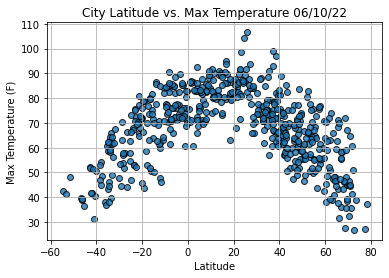

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

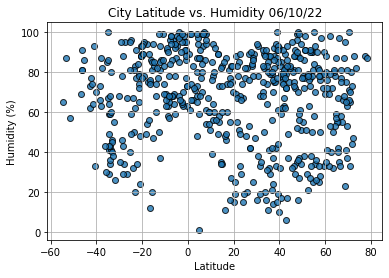

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

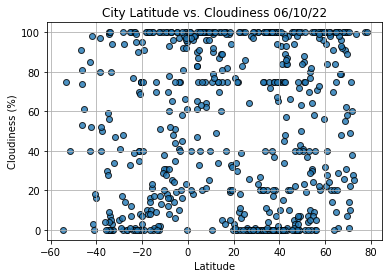

In [16]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

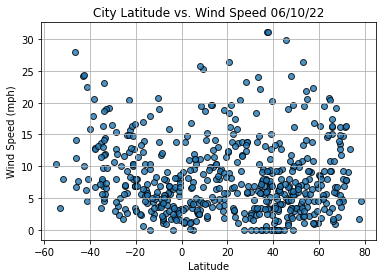

In [17]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                   Sao Filipe
Country                        CV
Date          2022-06-11 03:32:00
Lat                       14.8961
Lng                      -24.4956
Max Temp                    73.29
Humidity                       83
Cloudiness                      5
Wind Speed                  10.38
Name: 13, dtype: object

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

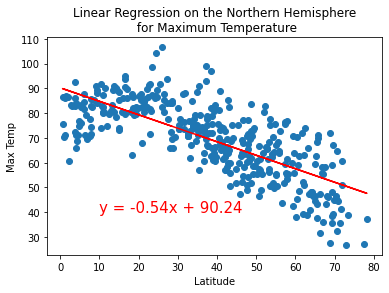

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))


In [22]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.5448507190170997, intercept=90.23933001313887, rvalue=-0.734581556776604, pvalue=8.35098607983218e-65, stderr=0.026058295409360322, intercept_stderr=1.1182406729099588)

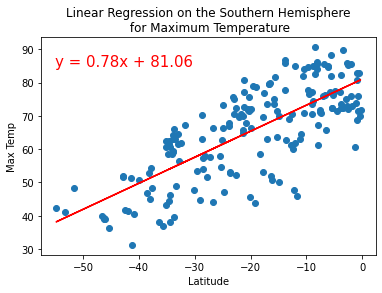

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-55,85))

In [24]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.7827716283322521, intercept=81.06168879866486, rvalue=0.7521274296207882, pvalue=5.626147911750194e-35, stderr=0.05070084334911921, intercept_stderr=1.2172154959208297)

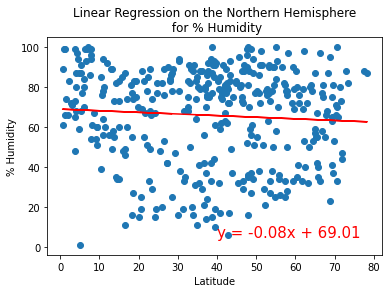

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,5))

In [26]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.08103710037668456, intercept=69.01114456159753, rvalue=-0.06827877968737942, pvalue=0.18705585268234534, stderr=0.06130967595213207, intercept_stderr=2.630984575759196)

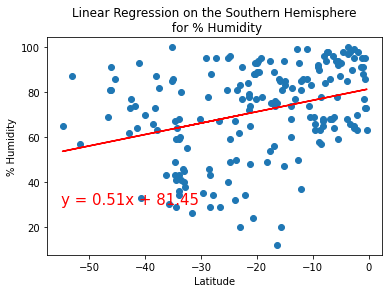

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-55,30))

In [28]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.507095626602371, intercept=81.44787548860214, rvalue=0.32682855982408704, pvalue=5.611095860405272e-06, stderr=0.10839632706777752, intercept_stderr=2.602356889791132)

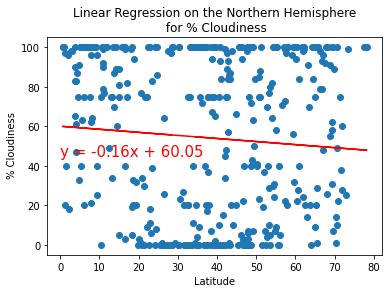

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Cloudiness', ' % Cloudiness',(0,45))

In [30]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.15527391735681334, intercept=60.052236275708694, rvalue=-0.07813299579668631, pvalue=0.1309675608824464, stderr=0.10258406907337503, intercept_stderr=4.4021942582340445)

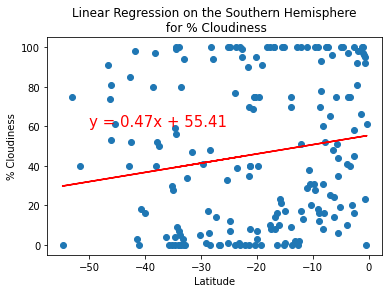

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

In [32]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.4675615880269523, intercept=55.40871330811316, rvalue=0.1641814139652026, pvalue=0.025539131285918438, stderr=0.20766133013070645, intercept_stderr=4.9854908171466965)

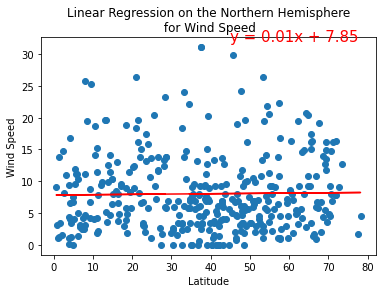

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(45,32))

In [34]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=0.005015292180347873, intercept=7.845656202025205, rvalue=0.016603160355493543, pvalue=0.7486139387929447, stderr=0.015638359504381395, intercept_stderr=0.6710895467516147)

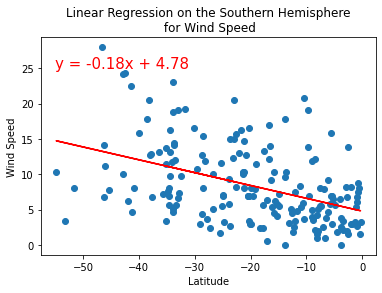

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-55,25))

In [36]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
linregress(x_values, y_values)

LinregressResult(slope=-0.1816439160714738, intercept=4.777295486833862, rvalue=-0.4402824150838452, pvalue=3.5829244226350067e-10, stderr=0.027382448296544057, intercept_stderr=0.6573922282376271)